In [2]:
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy.ndimage as nd
from scipy.ndimage import grey_opening, binary_dilation, median_filter
from skimage.util import img_as_uint
from skimage.transform import rescale, resize

def fill(data, invalid=None):
    """
    Replace the value of invalid 'data' cells (indicated by 'invalid') 
    by the value of the nearest valid data cell

    Input:
        data:    numpy array of any dimension
        invalid: a binary array of same shape as 'data'. True cells set where data
                 value should be replaced.
                 If None (default), use: invalid  = np.isnan(data)

    Output: 
        Return a filled array. 
    """
    #import numpy as np
    #import scipy.ndimage as nd

    if invalid is None: invalid = np.isnan(data)

    ind = nd.distance_transform_edt(invalid, return_distances=False, return_indices=True)
    return data[tuple(ind)]


def smart_tophat(image_fn, image_output_suffix="_tophat", mask_median_filter=10, mask_bright_threshold=12000, mask_dark_threshold=2000, mask_dilate_bright=10, mask_dilate_dark=10, tophat_size=10,tophat_gaussian=20,bin=5):
    image = imread(image_fn)
    # Shrink image by binning
    image = resize(image, (image.shape[0] // bin, image.shape[1] // bin),
                       anti_aliasing=True)
    image=np.int32(image*65000)
    image_filter = median_filter(image,mask_median_filter)
    bright_mask = image_filter > mask_bright_threshold
    bright_mask = binary_dilation(bright_mask, iterations=mask_dilate_bright)
    dark_mask = image_filter < mask_dark_threshold 
    dark_mask = binary_dilation(dark_mask, iterations=mask_dilate_dark)


    mask = np.invert(bright_mask | dark_mask)
    plt.imshow(mask,cmap='gray')
    #masked_image = image * mask
    masked_image = fill(image,np.invert(mask))
    #imsave(f'/scratch/bern/elferich/deco_lace_manuscript_processing/refined_assembly_it2/{image_fn[-27:-4]}_masked_da2100_bri10000_dilbri50_dilda30.tif',masked_image)
    #continue
    opened_image = grey_opening(masked_image, size=tophat_size)
    corr_image = (image) -nd.gaussian_filter(opened_image,tophat_gaussian)
    #corr_image[corr_image < -500 ] = -500
    #corr_image[corr_image > 5000.0] = 5000.0
    #corr_image *= 10
    corr_image = img_as_uint(corr_image+10000)
    imsave(f'{image_fn[:-4]}{image_output_suffix}.tif',corr_image)

/groups/elferich/.conda/envs/manubot/lib/python3.10/site-packages/skimage/util/dtype.py:492: UserWarning: Downcasting int32 to uint16 without scaling because max value 22687 fits in uint16
  return _convert(image, np.uint16, force_copy)


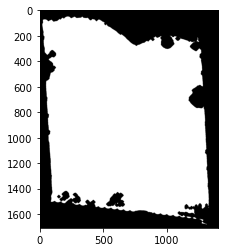

In [3]:
images = glob.glob('/scratch/bern/elferich/deco_lace_manuscript_processing/refined_assembly_it2/???_lamella?_montage_t2.tif')
smart_tophat(images[0])

/groups/elferich/.conda/envs/manubot/lib/python3.10/site-packages/skimage/util/dtype.py:492: UserWarning: Downcasting int32 to uint16 without scaling because max value 27745 fits in uint16
  return _convert(image, np.uint16, force_copy)


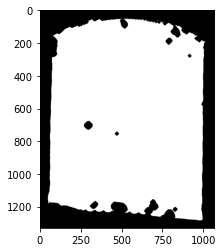

In [4]:
smart_tophat(images[1])


/groups/elferich/.conda/envs/manubot/lib/python3.10/site-packages/skimage/util/dtype.py:492: UserWarning: Downcasting int32 to uint16 without scaling because max value 23934 fits in uint16
  return _convert(image, np.uint16, force_copy)


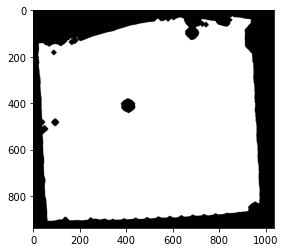

In [5]:
smart_tophat(images[2])

/groups/elferich/.conda/envs/manubot/lib/python3.10/site-packages/skimage/util/dtype.py:492: UserWarning: Downcasting int32 to uint16 without scaling because max value 31855 fits in uint16
  return _convert(image, np.uint16, force_copy)


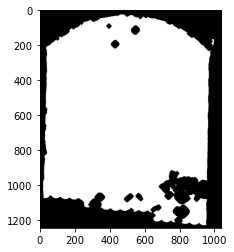

In [6]:
smart_tophat(images[3])

/groups/elferich/.conda/envs/manubot/lib/python3.10/site-packages/skimage/util/dtype.py:492: UserWarning: Downcasting int32 to uint16 without scaling because max value 25300 fits in uint16
  return _convert(image, np.uint16, force_copy)


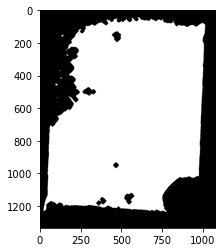

In [7]:
smart_tophat(images[4])

/groups/elferich/.conda/envs/manubot/lib/python3.10/site-packages/skimage/util/dtype.py:492: UserWarning: Downcasting int32 to uint16 without scaling because max value 25777 fits in uint16
  return _convert(image, np.uint16, force_copy)
/groups/elferich/.conda/envs/manubot/lib/python3.10/site-packages/skimage/util/dtype.py:492: UserWarning: Downcasting int32 to uint16 without scaling because max value 24876 fits in uint16
  return _convert(image, np.uint16, force_copy)
/groups/elferich/.conda/envs/manubot/lib/python3.10/site-packages/skimage/util/dtype.py:492: UserWarning: Downcasting int32 to uint16 without scaling because max value 31784 fits in uint16
  return _convert(image, np.uint16, force_copy)


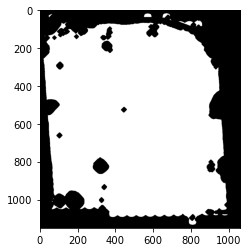

In [9]:
smart_tophat(images[5])
smart_tophat(images[6])
smart_tophat(images[7])

NameError: name 'image' is not defined

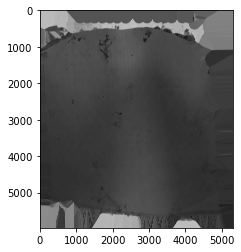

In [ ]:
plt.imshow(masked_image,cmap='gray')

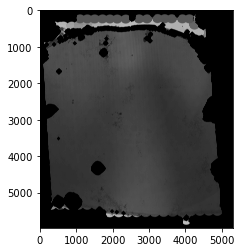

In [ ]:
plt.imshow(image*mask,cmap='gray')

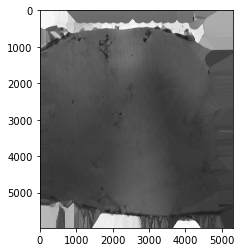

In [ ]:
plt.imshow(opened_image,cmap='gray')

In [ ]:
imsave('/scratch/bern/elferich/deco_lace_manuscript_processing/views/t_opened.tif',nd.gaussian_filter(opened_image,20))

/tmp/ipykernel_84854/971652425.py:1: UserWarning: /scratch/bern/elferich/deco_lace_manuscript_processing/views/t_opened.tif is a low contrast image
  imsave('/scratch/bern/elferich/deco_lace_manuscript_processing/views/t_opened.tif',nd.gaussian_filter(opened_image,20))
